# Nama : Meliza Wulandari
# NIM : 121450065
# Kelas RC
# Praktikum Damin

## **Praktikum 1 : Data Integration**

In [ ]:
import pandas as pd
dataset1 = "/content/student (1).csv"
dataset2 = "/content/mark (1).csv"

df1 = pd.read_csv(dataset1, header = 0)

df2 = pd.read_csv(dataset2, header = 0)

In [ ]:
df1.head()

,Student_id,Age,Gender,Grade,Employed
0,1,19,Male,1st Class,yes
1,2,20,Female,2nd Class,no
2,3,18,Male,1st Class,no
3,4,21,Female,2nd Class,no
4,5,19,Male,1st Class,no


In [ ]:
df2.head()

,Student_id,Mark,City
0,1,95,Chennai
1,2,70,Delhi
2,3,98,Mumbai
3,4,75,Pune
4,5,89,Kochi


In [ ]:
df = pd.merge(df1, df2, on = 'Student_id')

df.head(10)

,Student_id,Age,Gender,Grade,Employed,Mark,City
0,1,19,Male,1st Class,yes,95,Chennai
1,2,20,Female,2nd Class,no,70,Delhi
2,3,18,Male,1st Class,no,98,Mumbai
3,4,21,Female,2nd Class,no,75,Pune
4,5,19,Male,1st Class,no,89,Kochi
5,6,20,Male,2nd Class,yes,69,Gwalior
6,7,19,Female,3rd Class,yes,52,Bhopal
7,8,21,Male,3rd Class,yes,54,Chennai
8,9,22,Female,3rd Class,yes,55,Delhi
9,10,21,Male,1st Class,no,94,Mumbai


In [ ]:
#Saving the new dataset into a csv file
df.to_csv("data_integration.csv")

## **Praktikum 2 : Data Reduction**

In [ ]:
! pip install ipython-autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.6 MB/s eta 0:00:00


In [ ]:
# load time of execution for each block
%load_ext autotime

time: 465 µs (started: 2023-09-29 01:31:48 +00:00)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.manifold import TSNE

time: 2.73 s (started: 2023-09-29 01:32:04 +00:00)


### The Digits Dataset

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
data = digits.images[0]

time: 7.12 ms (started: 2023-09-29 01:32:35 +00:00)


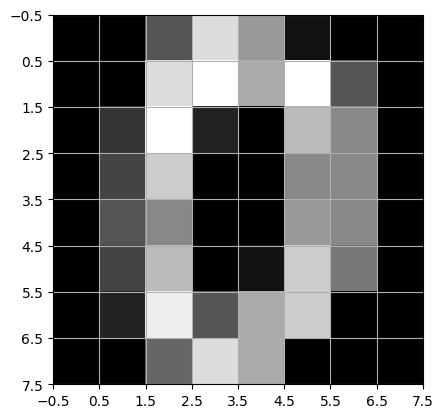

time: 1.12 s (started: 2023-09-29 01:32:45 +00:00)


In [ ]:
#Display the first digit
plt.imshow(data, cmap = 'gray', interpolation='nearest')
plt.xticks(np.arange(-0.5, 8.5, 1))
plt.yticks(np.arange(-0.5, 8.5, 1))
plt.grid(True)
plt.show()

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

time: 6.22 ms (started: 2023-09-29 01:32:59 +00:00)


In [ ]:
digits.images[0].shape

(8, 8)

time: 14.9 ms (started: 2023-09-29 01:33:10 +00:00)


In [ ]:
digits.data[0].shape

(64,)

time: 5.25 ms (started: 2023-09-29 01:33:18 +00:00)


In [ ]:
digitsX = digits.data
digitsY = digits.target

time: 758 µs (started: 2023-09-29 01:33:28 +00:00)


### PCA on the Digits Dataset - 2 Componens

In [ ]:
pca2 = PCA(n_components = 2)
digits_pca2 = pca2.fit_transform(digitsX)

time: 133 ms (started: 2023-09-29 01:34:07 +00:00)


In [ ]:
print(pca2.explained_variance_ratio_)
print(pca2.singular_values_)

[0.14890594 0.13618771]
[567.0065665  542.25185421]
time: 16.8 ms (started: 2023-09-29 01:34:14 +00:00)


In [ ]:
digits_pca2 = pd.DataFrame(data = digits_pca2, columns = ['comp1', 'comp2'])
digits_pca2['label'] = digitsY

time: 2.18 ms (started: 2023-09-29 01:34:21 +00:00)


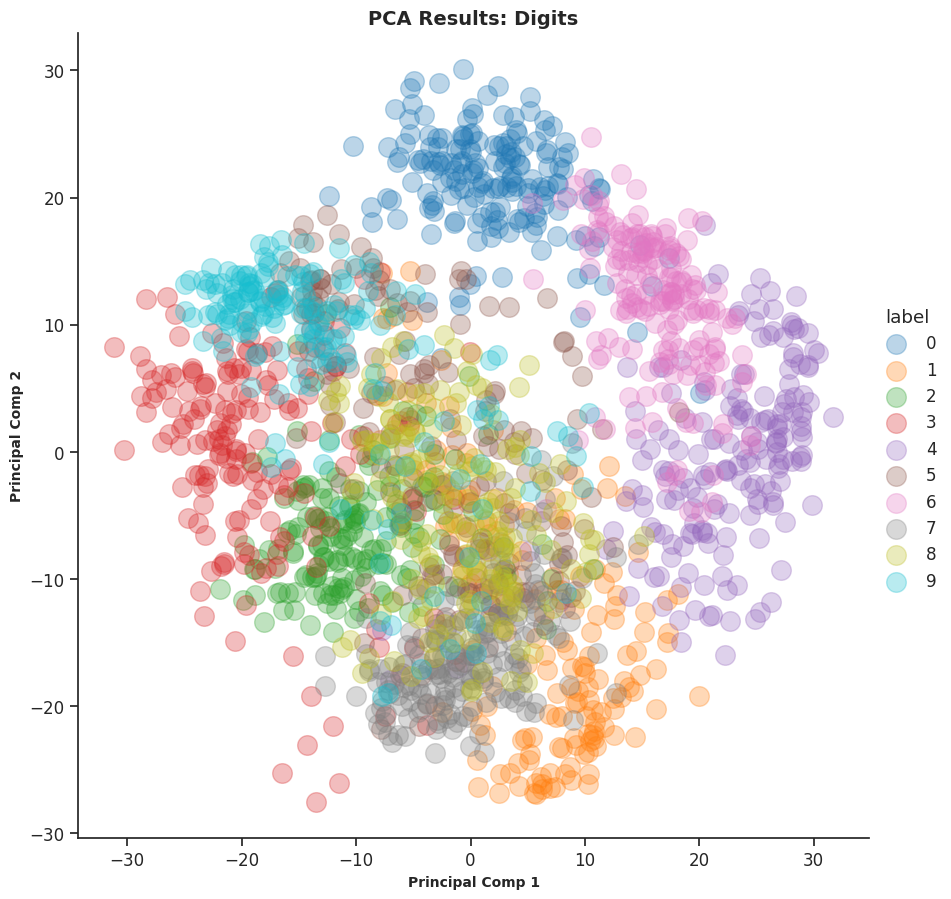

time: 2.41 s (started: 2023-09-29 01:34:31 +00:00)


In [ ]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='comp1',
           y='comp2',
           data=digits_pca2,
           fit_reg=False,
           legend=True,
           height=9,
           hue = 'label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Principal Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Comp 2', weight='bold').set_fontsize('10')

### SVD on Digits- 2 Components

In [ ]:
svd2 = TruncatedSVD(n_components = 2)

time: 3.05 ms (started: 2023-09-29 01:34:57 +00:00)


In [ ]:
digits_svd2 = svd2.fit_transform(digitsX)

time: 56.4 ms (started: 2023-09-29 01:35:05 +00:00)


In [ ]:
digits_svd2 = pd.DataFrame(data = digits_svd2, columns = ['comp1', 'comp2'])
digits_svd2['label'] = digitsY

time: 9.43 ms (started: 2023-09-29 01:35:11 +00:00)


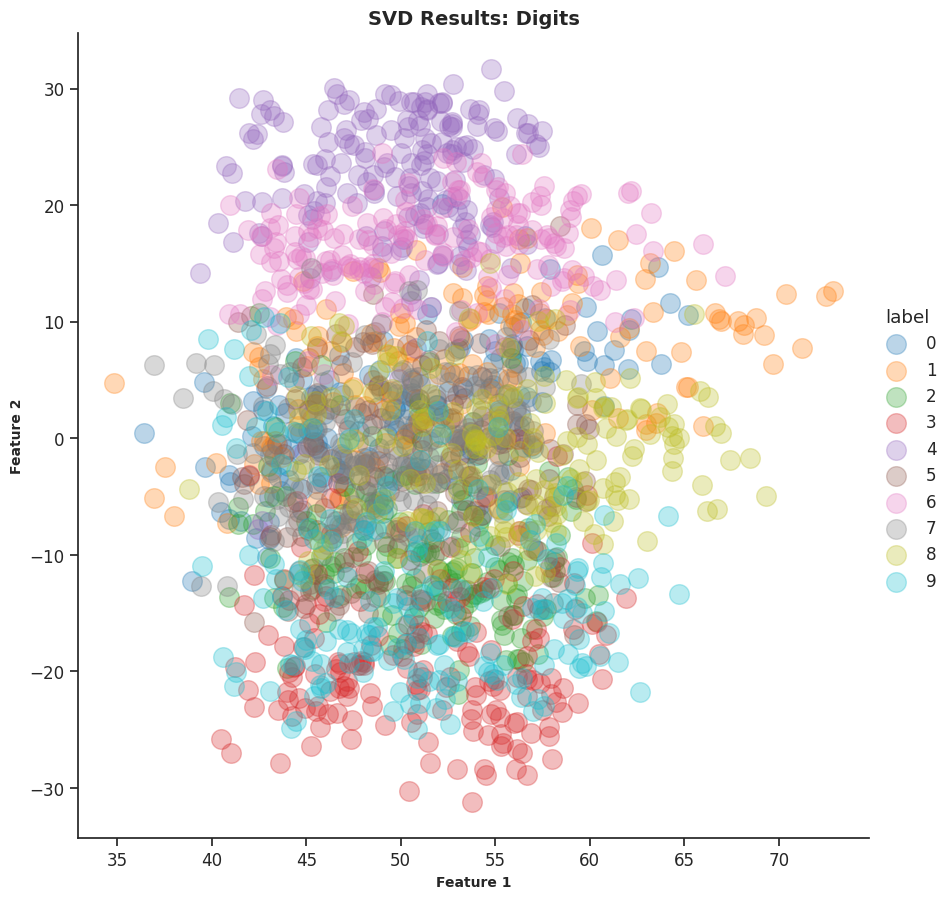

time: 2.31 s (started: 2023-09-29 01:35:23 +00:00)


In [ ]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='comp1',
           y='comp2',
           data=digits_svd2,
           fit_reg=False,
           legend=True,
           height=9,
           hue = 'label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('SVD Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Feature 1', weight='bold').set_fontsize('10')
plt.ylabel('Feature 2', weight='bold').set_fontsize('10')

### TSNE on Digits - 2 Components

In [ ]:
tsne2 = TSNE(n_components = 2)
digits_tsne2 = tsne2.fit_transform(digitsX)

time: 16.7 s (started: 2023-09-29 01:35:51 +00:00)


In [ ]:
digits_tsne2 = pd.DataFrame(data = digits_tsne2, columns = ['comp1', 'comp2'])
digits_tsne2['label'] = digitsY

time: 3.64 ms (started: 2023-09-29 01:36:10 +00:00)


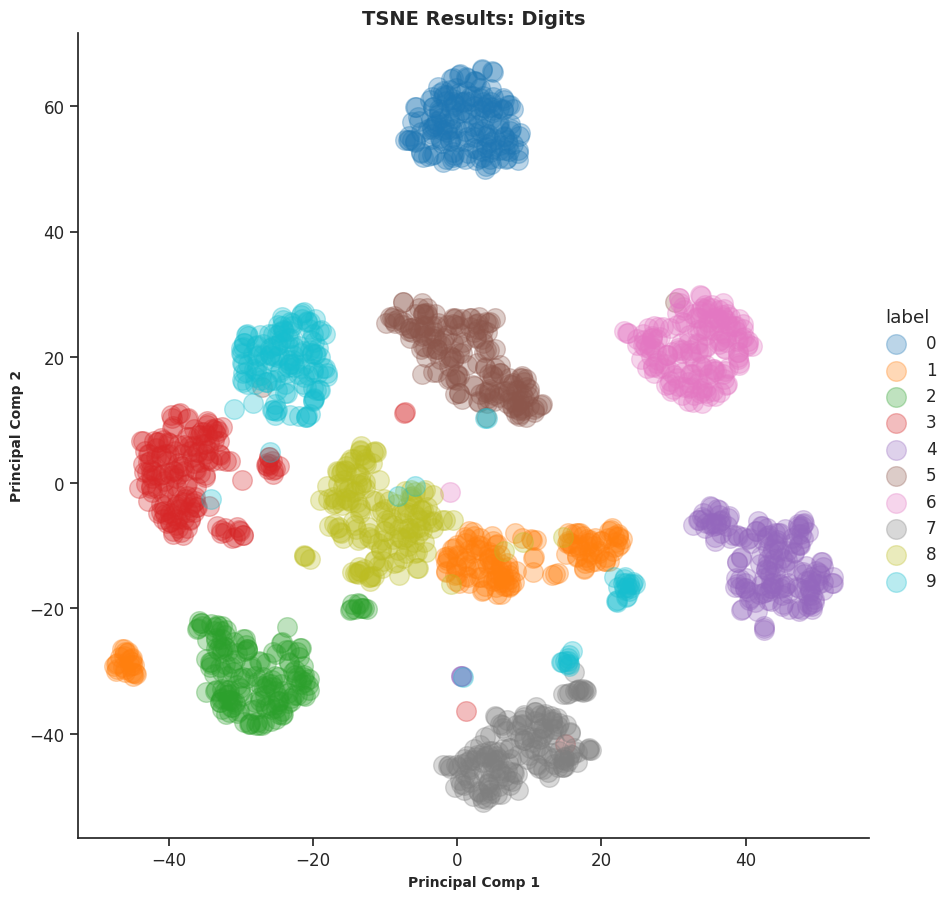

time: 1.42 s (started: 2023-09-29 01:36:20 +00:00)


In [ ]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='comp1',
           y='comp2',
           data=digits_tsne2,
           fit_reg=False,
           legend=True,
           height=9,
           hue = 'label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('TSNE Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Principal Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Comp 2', weight='bold').set_fontsize('10')

### PCA on Digits - 3 Components

In [ ]:
pca3 = PCA(n_components = 3)
digits_pca3= pca3.fit_transform(digitsX)

time: 94.1 ms (started: 2023-09-29 01:37:00 +00:00)


In [ ]:
digits_pca3.shape

(1797, 3)

time: 11.9 ms (started: 2023-09-29 01:37:10 +00:00)


In [ ]:
digits_pca3 = pd.DataFrame(data = digits_pca3, columns = ['comp1', 'comp2', 'comp3'])
digits_pca3['label'] = digitsY

time: 10.7 ms (started: 2023-09-29 01:37:17 +00:00)


In [ ]:
# This is the 3D plotting toolkit
from mpl_toolkits.mplot3d import Axes3D

time: 1.77 ms (started: 2023-09-29 01:37:26 +00:00)


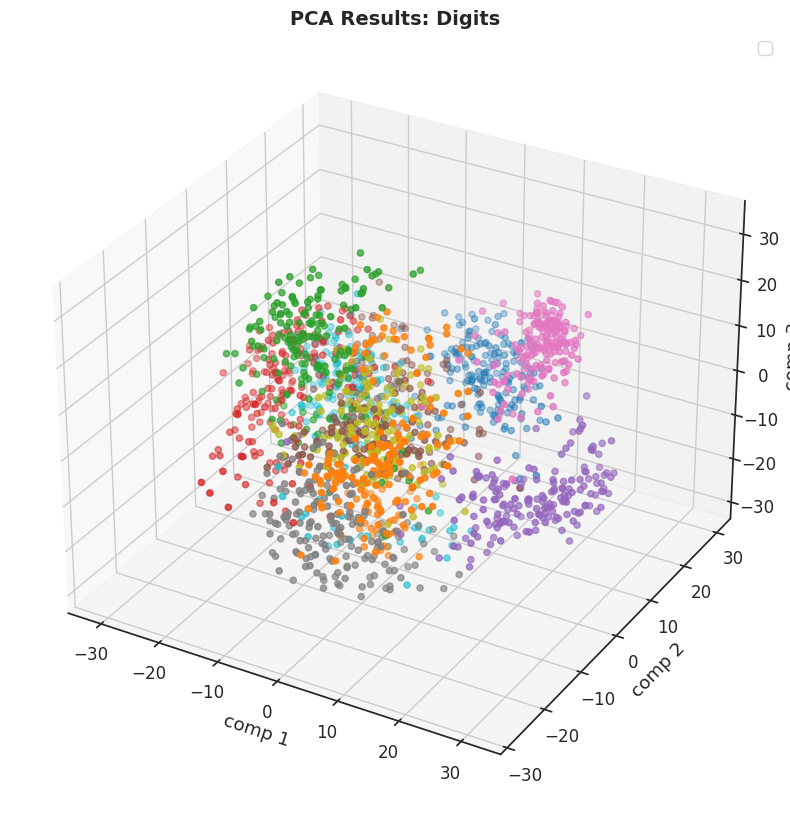

time: 614 ms (started: 2023-09-29 01:37:34 +00:00)


In [ ]:
plt.figure(figsize = (16, 10))
ax = plt.axes(projection='3d')
ax.scatter(
    xs=digits_pca3.loc[:, 'comp1'],
    ys=digits_pca3.loc[:, 'comp2'],
    zs=digits_pca3.loc[:, 'comp3'],
    c=digits_pca3.loc[:, 'label'],
    cmap='tab10'
)
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_zlabel('comp 3')
ax.legend()
plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.show()

### SVD on Digits - 3 Components

In [ ]:
svd3 = TruncatedSVD(n_components = 3)

time: 892 µs (started: 2023-09-29 01:38:37 +00:00)


In [ ]:
digits_svd3 = svd3.fit_transform(digitsX)

time: 61.9 ms (started: 2023-09-29 01:38:45 +00:00)


In [ ]:
digits_svd3 = pd.DataFrame(data = digits_svd3, columns = ['comp1', 'comp2', 'comp3'])
digits_svd3['label'] = digitsY

time: 14.6 ms (started: 2023-09-29 01:38:53 +00:00)


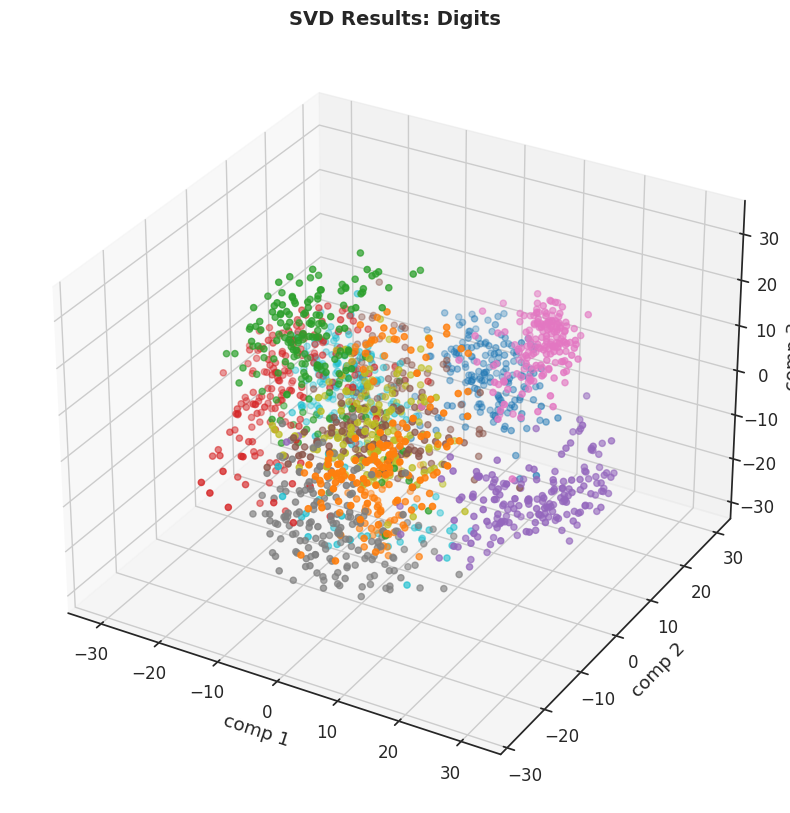

time: 554 ms (started: 2023-09-29 01:39:03 +00:00)


In [ ]:
plt.figure(figsize = (16, 10))
ax = plt.axes(projection='3d')
ax.scatter(
    xs=digits_pca3.loc[:, 'comp1'],
    ys=digits_pca3.loc[:, 'comp2'],
    zs=digits_pca3.loc[:, 'comp3'],
    c=digits_pca3.loc[:, 'label'],
    cmap='tab10',
)
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_zlabel('comp 3')
plt.title('SVD Results: Digits', weight='bold').set_fontsize('14')
plt.show()

### TSNE on Digits - 3 Components

In [ ]:
tsne3 = TSNE(n_components = 3)
digits_tsne3 = tsne3.fit_transform(digitsX)

time: 45.9 s (started: 2023-09-29 01:39:29 +00:00)


In [ ]:
digits_tsne3 = pd.DataFrame(data = digits_tsne3, columns = ['comp1', 'comp2', 'comp3'])
digits_tsne3['label'] = digitsY

time: 2.14 ms (started: 2023-09-29 01:40:19 +00:00)


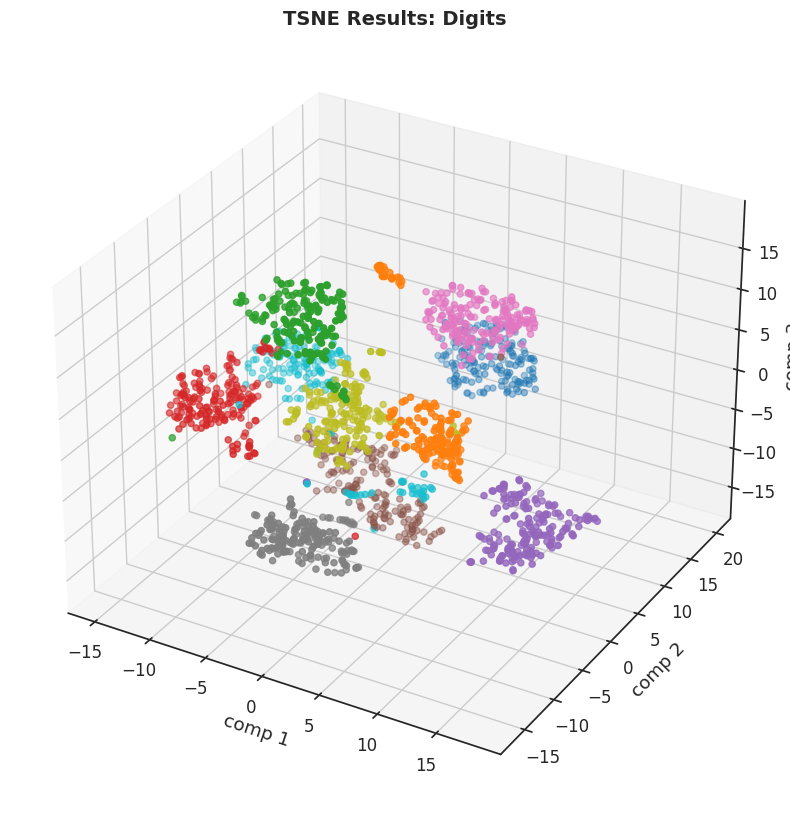

time: 598 ms (started: 2023-09-29 01:40:21 +00:00)


In [ ]:
plt.figure(figsize = (16, 10))
ax = plt.axes(projection='3d')
ax.scatter(
    xs=digits_tsne3.loc[:, 'comp1'],
    ys=digits_tsne3.loc[:, 'comp2'],
    zs=digits_tsne3.loc[:, 'comp3'],
    c=digits_tsne3.loc[:, 'label'],
    cmap='tab10'
)
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_zlabel('comp 3')
plt.title('TSNE Results: Digits', weight='bold').set_fontsize('14')
plt.show()

##**Praktikum 3 : Data Transformation and Data Discretization**

## Data Transformation (Encoding)

In [ ]:
import pandas as pd

import numpy as np

dataset = "/content/student (1).csv"

df = pd.read_csv(dataset, header = 0)

time: 15.6 ms (started: 2023-09-29 01:42:09 +00:00)


In [ ]:
df_categorical = df.select_dtypes(exclude=[np.number])

df_categorical

,Gender,Grade,Employed
0,Male,1st Class,yes
1,Female,2nd Class,no
2,Male,1st Class,no
3,Female,2nd Class,no
4,Male,1st Class,no
...,...,...,...
227,Female,1st Class,no
228,Male,2nd Class,no
229,Male,3rd Class,yes
230,Female,1st Class,yes


time: 58.2 ms (started: 2023-09-29 01:43:16 +00:00)


In [ ]:
df_categorical['Grade'].unique()

array(['1st Class', '2nd Class', '3rd Class'], dtype=object)

time: 16.6 ms (started: 2023-09-29 01:44:08 +00:00)


In [ ]:
df_categorical.Grade.value_counts()

2nd Class    80
3rd Class    80
1st Class    72
Name: Grade, dtype: int64

time: 9.94 ms (started: 2023-09-29 01:44:46 +00:00)


In [ ]:
df_categorical.Gender.value_counts()

Male      136
Female     96
Name: Gender, dtype: int64

time: 18.8 ms (started: 2023-09-29 01:45:42 +00:00)


In [ ]:
df_categorical.Employed.value_counts()

no     133
yes     99
Name: Employed, dtype: int64

time: 26.9 ms (started: 2023-09-29 01:46:00 +00:00)


In [ ]:
df_categorical.Grade.replace({"1st Class":1, "2nd Class":2, "3nd Class":3}, inplace=True)

time: 7.66 ms (started: 2023-09-29 01:47:48 +00:00)


In [ ]:
df_categorical.Gender.replace({"Male":0, "Female":1}, inplace=True)

time: 3.97 ms (started: 2023-09-29 01:48:47 +00:00)


In [ ]:
df_categorical.Employed.replace({"Yes":1, "No":0}, inplace=True)

time: 10.4 ms (started: 2023-09-29 01:49:26 +00:00)


In [ ]:
df_categorical.head()

,Gender,Grade,Employed
0,0,1,yes
1,1,2,no
2,0,1,no
3,1,2,no
4,0,1,no


time: 11.6 ms (started: 2023-09-29 01:49:42 +00:00)


In [ ]:
# saving the new dataset into a csv file
df_categorical.to_csv("data_transformation_encoding.csv")

time: 7.34 ms (started: 2023-09-29 01:50:45 +00:00)


## Data Transformation (Label Encoding)

In [ ]:
import numpy as np

dataset = "/content/Banking_Marketing (1).csv"

df = pd.read_csv(dataset, header=0)

time: 268 ms (started: 2023-09-29 01:54:14 +00:00)


In [ ]:
df = df.dropna()

time: 334 ms (started: 2023-09-29 01:54:30 +00:00)


In [ ]:
data_column_category = df.select_dtypes(exclude=[np.number]).columns

data_column_category

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

time: 11.8 ms (started: 2023-09-29 01:55:36 +00:00)


In [ ]:
df[data_column_category].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success


time: 37.6 ms (started: 2023-09-29 01:56:02 +00:00)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for i in data_column_category:
    df[i] = label_encoder.fit_transform(df[i])
print("Label Encode Data: ")
df.head()

Label Encode Data: 


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,1,1,0,1,2,0,0,1,2,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,9,1,7,0,0,0,0,7,0,...,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,4,2,6,0,2,0,0,4,2,...,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,7,1,3,0,0,0,0,0,0,...,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,5,1,0,0,2,0,0,1,0,...,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


time: 454 ms (started: 2023-09-29 01:58:05 +00:00)


In [ ]:
# saving the new dataset into a csv file
df.to_csv("data_transformation_labeling_encoding.csv")

time: 416 ms (started: 2023-09-29 01:59:38 +00:00)


## Data Discretization

In [ ]:
import pandas as pd

dataset = "/content/Student_bucketing (1).csv"

df = pd.read_csv(dataset, header = 0)

time: 21.8 ms (started: 2023-09-29 02:01:17 +00:00)


In [ ]:
df.head()

,Student_id,Age,Grade,Employed,marks
0,1,19,1st Class,yes,29
1,2,20,2nd Class,no,41
2,3,18,1st Class,no,57
3,4,21,2nd Class,no,29
4,5,19,1st Class,no,57


time: 43.4 ms (started: 2023-09-29 02:01:27 +00:00)


In [ ]:
df['bucket']=pd.cut(df['marks'],5,labels=['Poor','Below_average','Average','Above_Average','Excellent'])

df.head(10)

,Student_id,Age,Grade,Employed,marks,bucket
0,1,19,1st Class,yes,29,Poor
1,2,20,2nd Class,no,41,Below_average
2,3,18,1st Class,no,57,Average
3,4,21,2nd Class,no,29,Poor
4,5,19,1st Class,no,57,Average
5,6,20,2nd Class,yes,53,Average
6,7,19,3rd Class,yes,78,Above_Average
7,8,21,3rd Class,yes,70,Above_Average
8,9,22,3rd Class,yes,97,Excellent
9,10,21,1st Class,no,58,Average


time: 44.5 ms (started: 2023-09-29 02:03:56 +00:00)


In [ ]:
# saving the new dataset into a csv file
df.to_csv("data_Discretization.csv")

time: 5.62 ms (started: 2023-09-29 02:05:39 +00:00)
